In [60]:
# Import Essential Librairies
import os 
import pandas as pd
import cv2
import numpy as np
import glob 
import matplotlib.pyplot as plt
import random 
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'c:\\Users\\soule\\Documents\\traffic detection'

In [ ]:
# images paths
train_dir = 'c:\\Users\\soule\\Documents\\traffic detection\\car\\train\\images'
test_dir = 'c:\\Users\\soule\\Documents\\traffic detection\\car\\test\\images'
val_dir = 'c:\\Users\\soule\\Documents\\traffic detection\\car\\valid\\images'


In [23]:
# function to display images
def show_images(directory, title = None, n=5):
    """
    Display a grid of images from a specified directory.
    
    Parameters:
    - directory: str, path to the directory containing images.
    - title: str, title for the plot (optional).
    - n: int, number of images to display (default is 5).
    """
    images = random.sample(os.listdir(directory), n)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        
        axes[i].imshow(img)
        axes[i].axis('off') # Hide axes
        axes[i].set_title(title)
    plt.show()


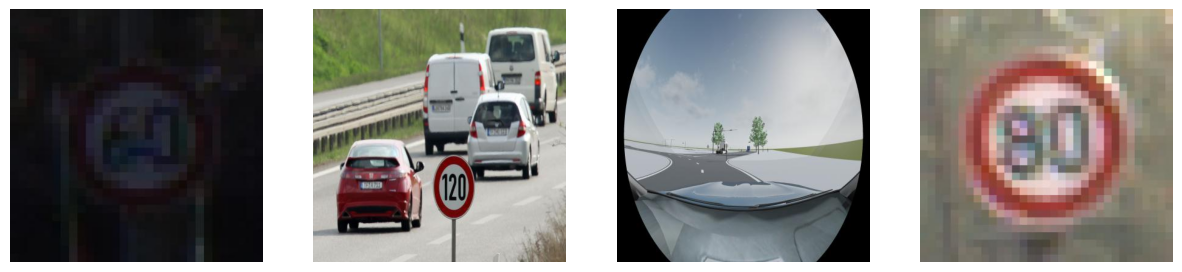

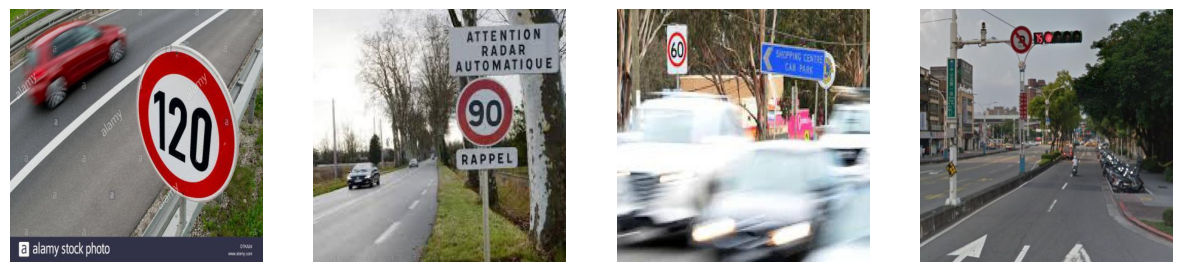

In [24]:
# Diosplay some images from trainset
show_images(train_dir, n=4)
# Display some images from testset
show_images(test_dir, n=4)

Image shape: (416, 416, 3)


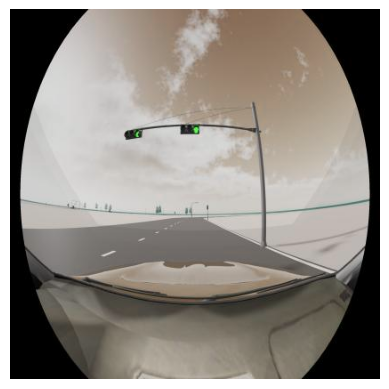

In [36]:
# Check the shape of an image
image = cv2.imread(os.path.join(train_dir, 'FisheyeCamera_1_01055_png.rf.bf7c9d64a08a26f03ae9d5480af21b4f.jpg'))
print(f"Image shape: {image.shape}")
plt.imshow(image)
plt.axis('off')
plt.show()

In [37]:
# imoprt libraries
from PIL import Image
from ultralytics import YOLO

#  Try Pre-trained YOLOv8 For Detect Traffic Signs
model0 = YOLO('yolov8n.pt')
# model predict method
results = model0.predict(source='c:\\Users\\soule\\Documents\\traffic detection\\car\\train\\images\\FisheyeCamera_1_01055_png.rf.bf7c9d64a08a26f03ae9d5480af21b4f.jpg', imgsz=(640))


image 1/1 c:\Users\soule\Documents\traffic detection\car\train\images\FisheyeCamera_1_01055_png.rf.bf7c9d64a08a26f03ae9d5480af21b4f.jpg: 640x640 1 airplane, 1 traffic light, 157.2ms
Speed: 6.5ms preprocess, 157.2ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


(-0.5, 415.5, 415.5, -0.5)

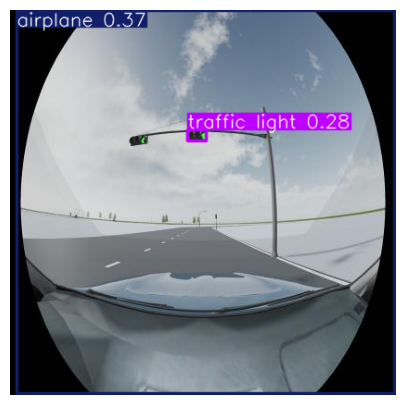

In [38]:
# show the results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))  
plt.imshow(plot)
plt.axis('off')

In [48]:
# final model train
model = YOLO('yolov8n.pt')
resultats_final = model.train(data='c:\\Users\\soule\\Documents\\traffic detection\\car\\data.yaml',
                               epochs=10,batch=-1, optimizer='auto')

Ultralytics 8.3.163  Python-3.12.7 torch-2.7.1+cpu CPU (Intel Core(TM) i5-7300U 2.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\soule\Documents\traffic detection\car\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

train: Scanning C:\Users\soule\Documents\traffic detection\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
WARNING AutoBatch: intended for CUDA devices, using default batch-size 16
train: Fast image access  (ping: 0.10.0 ms, read: 43.817.5 MB/s, size: 26.0 KB)


train: Scanning C:\Users\soule\Documents\traffic detection\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.00.0 ms, read: 73.527.3 MB/s, size: 19.9 KB)



val: Scanning C:\Users\soule\Documents\traffic detection\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.8641      4.043      1.217         16        640: 100%|██████████| 221/221 [34:25<00:00,  9.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [03:01<00:00,  6.98s/it]


                   all        801        944      0.245      0.459      0.289      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7588       2.99      1.081         13        640: 100%|██████████| 221/221 [32:50<00:00,  8.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:49<00:00,  6.51s/it]


                   all        801        944      0.454      0.511      0.474      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7303      2.355      1.056         10        640: 100%|██████████| 221/221 [32:42<00:00,  8.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:50<00:00,  6.54s/it]

                   all        801        944      0.659      0.564      0.657      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      0.696      1.771      1.033         11        640: 100%|██████████| 221/221 [32:56<00:00,  8.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:48<00:00,  6.48s/it]

                   all        801        944      0.764      0.703      0.778       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6716      1.429      1.007         12        640: 100%|██████████| 221/221 [32:47<00:00,  8.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:48<00:00,  6.49s/it]

                   all        801        944      0.819      0.749      0.813      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.6474      1.202     0.9903         10        640: 100%|██████████| 221/221 [32:45<00:00,  8.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:48<00:00,  6.47s/it]

                   all        801        944      0.906      0.731       0.85       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.6157       1.01     0.9736         14        640: 100%|██████████| 221/221 [32:48<00:00,  8.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:48<00:00,  6.48s/it]

                   all        801        944      0.929      0.787      0.892      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.5932     0.8884     0.9607         12        640: 100%|██████████| 221/221 [32:49<00:00,  8.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:47<00:00,  6.45s/it]

                   all        801        944      0.907      0.829      0.906      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.5748     0.8066     0.9479         12        640: 100%|██████████| 221/221 [32:55<00:00,  8.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:47<00:00,  6.46s/it]

                   all        801        944      0.916      0.842      0.919      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.5569     0.7569     0.9393         12        640: 100%|██████████| 221/221 [32:51<00:00,  8.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:49<00:00,  6.50s/it]

                   all        801        944      0.938      0.841      0.926      0.797



10 epochs completed in 5.972 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.163  Python-3.12.7 torch-2.7.1+cpu CPU (Intel Core(TM) i5-7300U 2.60GHz)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:31<00:00,  5.81s/it]


                   all        801        944      0.938      0.841      0.926      0.798
           Green Light         87        122      0.862      0.617      0.787      0.446
             Red Light         74        108      0.792      0.731      0.772      0.444
       Speed Limit 100         52         52      0.979       0.88      0.952      0.859
       Speed Limit 110         17         17      0.931        0.8      0.965      0.874
       Speed Limit 120         60         60      0.981      0.881      0.967      0.889
        Speed Limit 20         56         56      0.981      0.941      0.978      0.839
        Speed Limit 30         71         74      0.976      0.932      0.967      0.899
        Speed Limit 40         53         55      0.993      0.909      0.969      0.854
        Speed Limit 50         68         71       0.95      0.803      0.939      0.848
        Speed Limit 60         76         76      0.891      0.864       0.95      0.853
        Speed Limit 7

In [58]:
type(resultats_final.summary())

list

In [65]:
#csv file results
results_csv = pd.read_csv('C:\\Users\\soule\Documents\\traffic detection\\runs\detect\\train3\\results.csv', 
                          index_col="epoch")
results_csv

,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
epoch,,,,,,,,,,,,,,
1,2247.28,0.86407,4.04292,1.21694,0.24527,0.45918,0.28907,0.23083,0.78041,3.25784,1.10483,0.000175,0.000175,0.000175
2,4387.89,0.75878,2.98959,1.08143,0.45404,0.51109,0.47384,0.38561,0.76620,2.66253,1.10848,0.000315,0.000315,0.000315
3,6520.91,0.73032,2.35489,1.05649,0.65923,0.56363,0.65750,0.54679,0.73297,1.98550,1.06523,0.000421,0.000421,0.000421
4,8666.68,0.69604,1.77053,1.03345,0.76407,0.70262,0.77759,0.65044,0.70812,1.46005,1.03877,0.000370,0.000370,0.000370
5,10803.70,0.67162,1.42943,1.00699,0.81876,0.74887,0.81258,0.68931,0.68506,1.23680,1.02937,0.000318,0.000318,0.000318
6,12938.20,0.64740,1.20210,0.99033,0.90594,0.73057,0.85036,0.72006,0.65497,1.07453,1.00130,0.000266,0.000266,0.000266
7,15075.50,0.61566,1.01039,0.97364,0.92879,0.78714,0.89170,0.75481,0.63955,0.89902,0.99429,0.000214,0.000214,0.000214
8,17213.40,0.59324,0.88841,0.96074,0.90749,0.82856,0.90559,0.77716,0.61605,0.81044,0.97195,0.000161,0.000161,0.000161
9,19357.70,0.57477,0.80658,0.94794,0.91563,0.84205,0.91868,0.78702,0.60056,0.73768,0.96352,0.000109,0.000109,0.000109


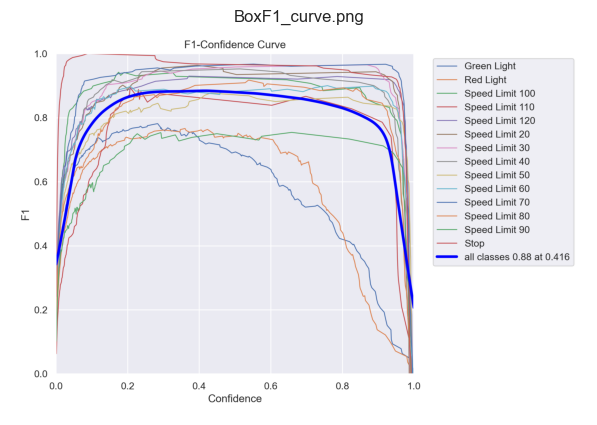

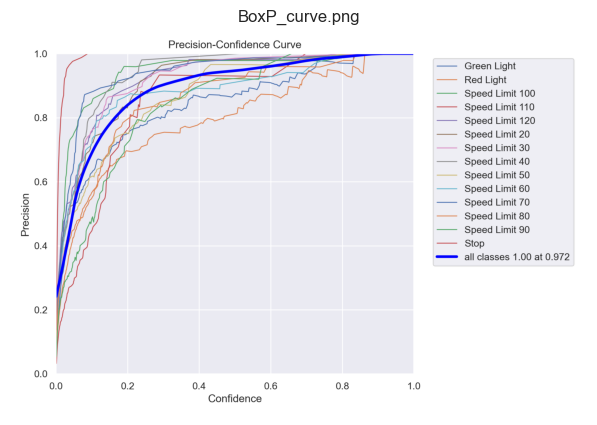

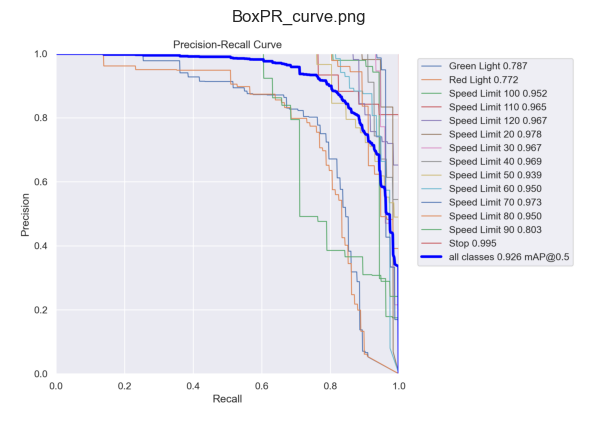

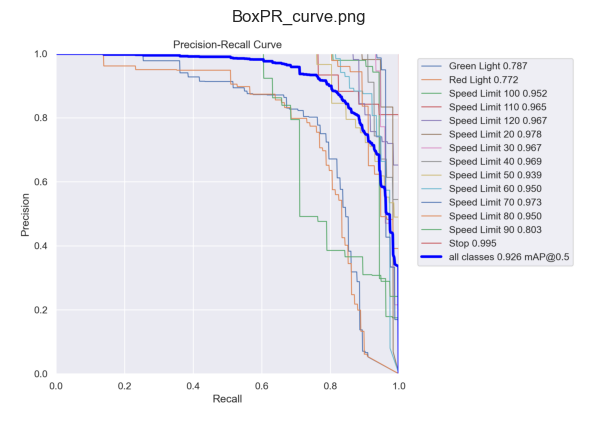

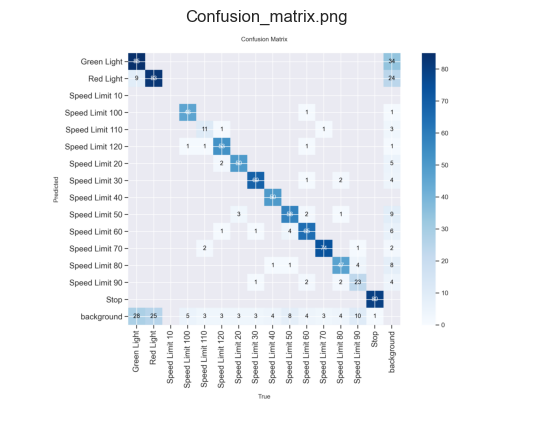

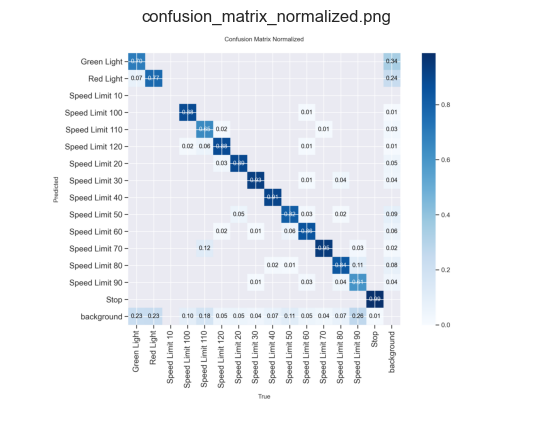

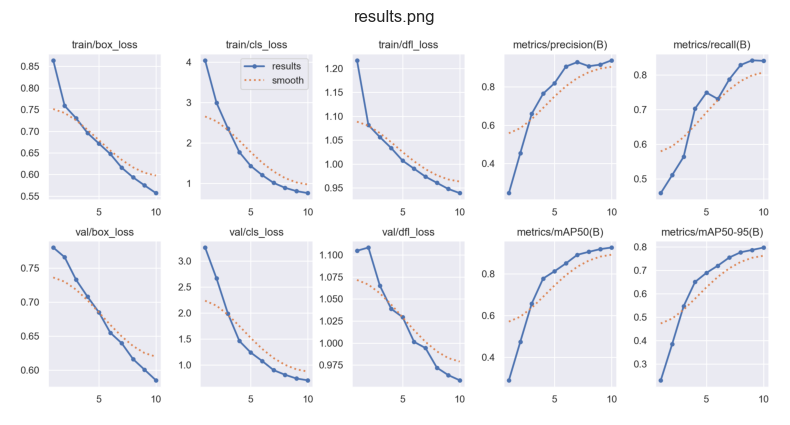

In [67]:
# display post training images
def display_post_training_images(directory, images_fils):

    for image_file in images_fils:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)
        plt.show()

# post training images directory
post_training_dir = 'c:\\Users\\soule\\Documents\\traffic detection\\runs\\detect\\train3'
# list of post training images
images_files = [ 'BoxF1_curve.png',
                'BoxP_curve.png',
                'BoxPR_curve.png',
                'BoxPR_curve.png',
                'Confusion_matrix.png',
                'confusion_matrix_normalized.png',
                'results.png'
]

# display post training images
display_post_training_images(post_training_dir, images_files)

In [71]:
results_csv.columns.str.strip()

Index(['time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

In [73]:
results_summary = pd.DataFrame(resultats_final.summary())

In [74]:
results_summary['Images'].sum()

867

In [75]:
results_summary

,Class,Images,Instances,Box-P,Box-R,Box-F1,mAP50,mAP50-95
0,Green Light,87,122,0.86247,0.61687,0.71929,0.78660,0.44614
1,Red Light,74,108,0.79180,0.73148,0.76045,0.77221,0.44408
2,Speed Limit 100,52,52,0.97860,0.87955,0.92644,0.95224,0.85882
3,Speed Limit 110,17,17,0.93140,0.79962,0.86050,0.96494,0.87421
4,Speed Limit 120,60,60,0.98143,0.88083,0.92841,0.96719,0.88942
5,Speed Limit 20,56,56,0.98137,0.94092,0.96072,0.97781,0.83915
6,Speed Limit 30,71,74,0.97602,0.93243,0.95373,0.96709,0.89916
7,Speed Limit 40,53,55,0.99304,0.90909,0.94921,0.96921,0.85374
8,Speed Limit 50,68,71,0.95041,0.80282,0.87040,0.93908,0.84753
9,Speed Limit 60,76,76,0.89135,0.86358,0.87724,0.95004,0.85307


In [76]:
results_csv.columns

Index(['time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

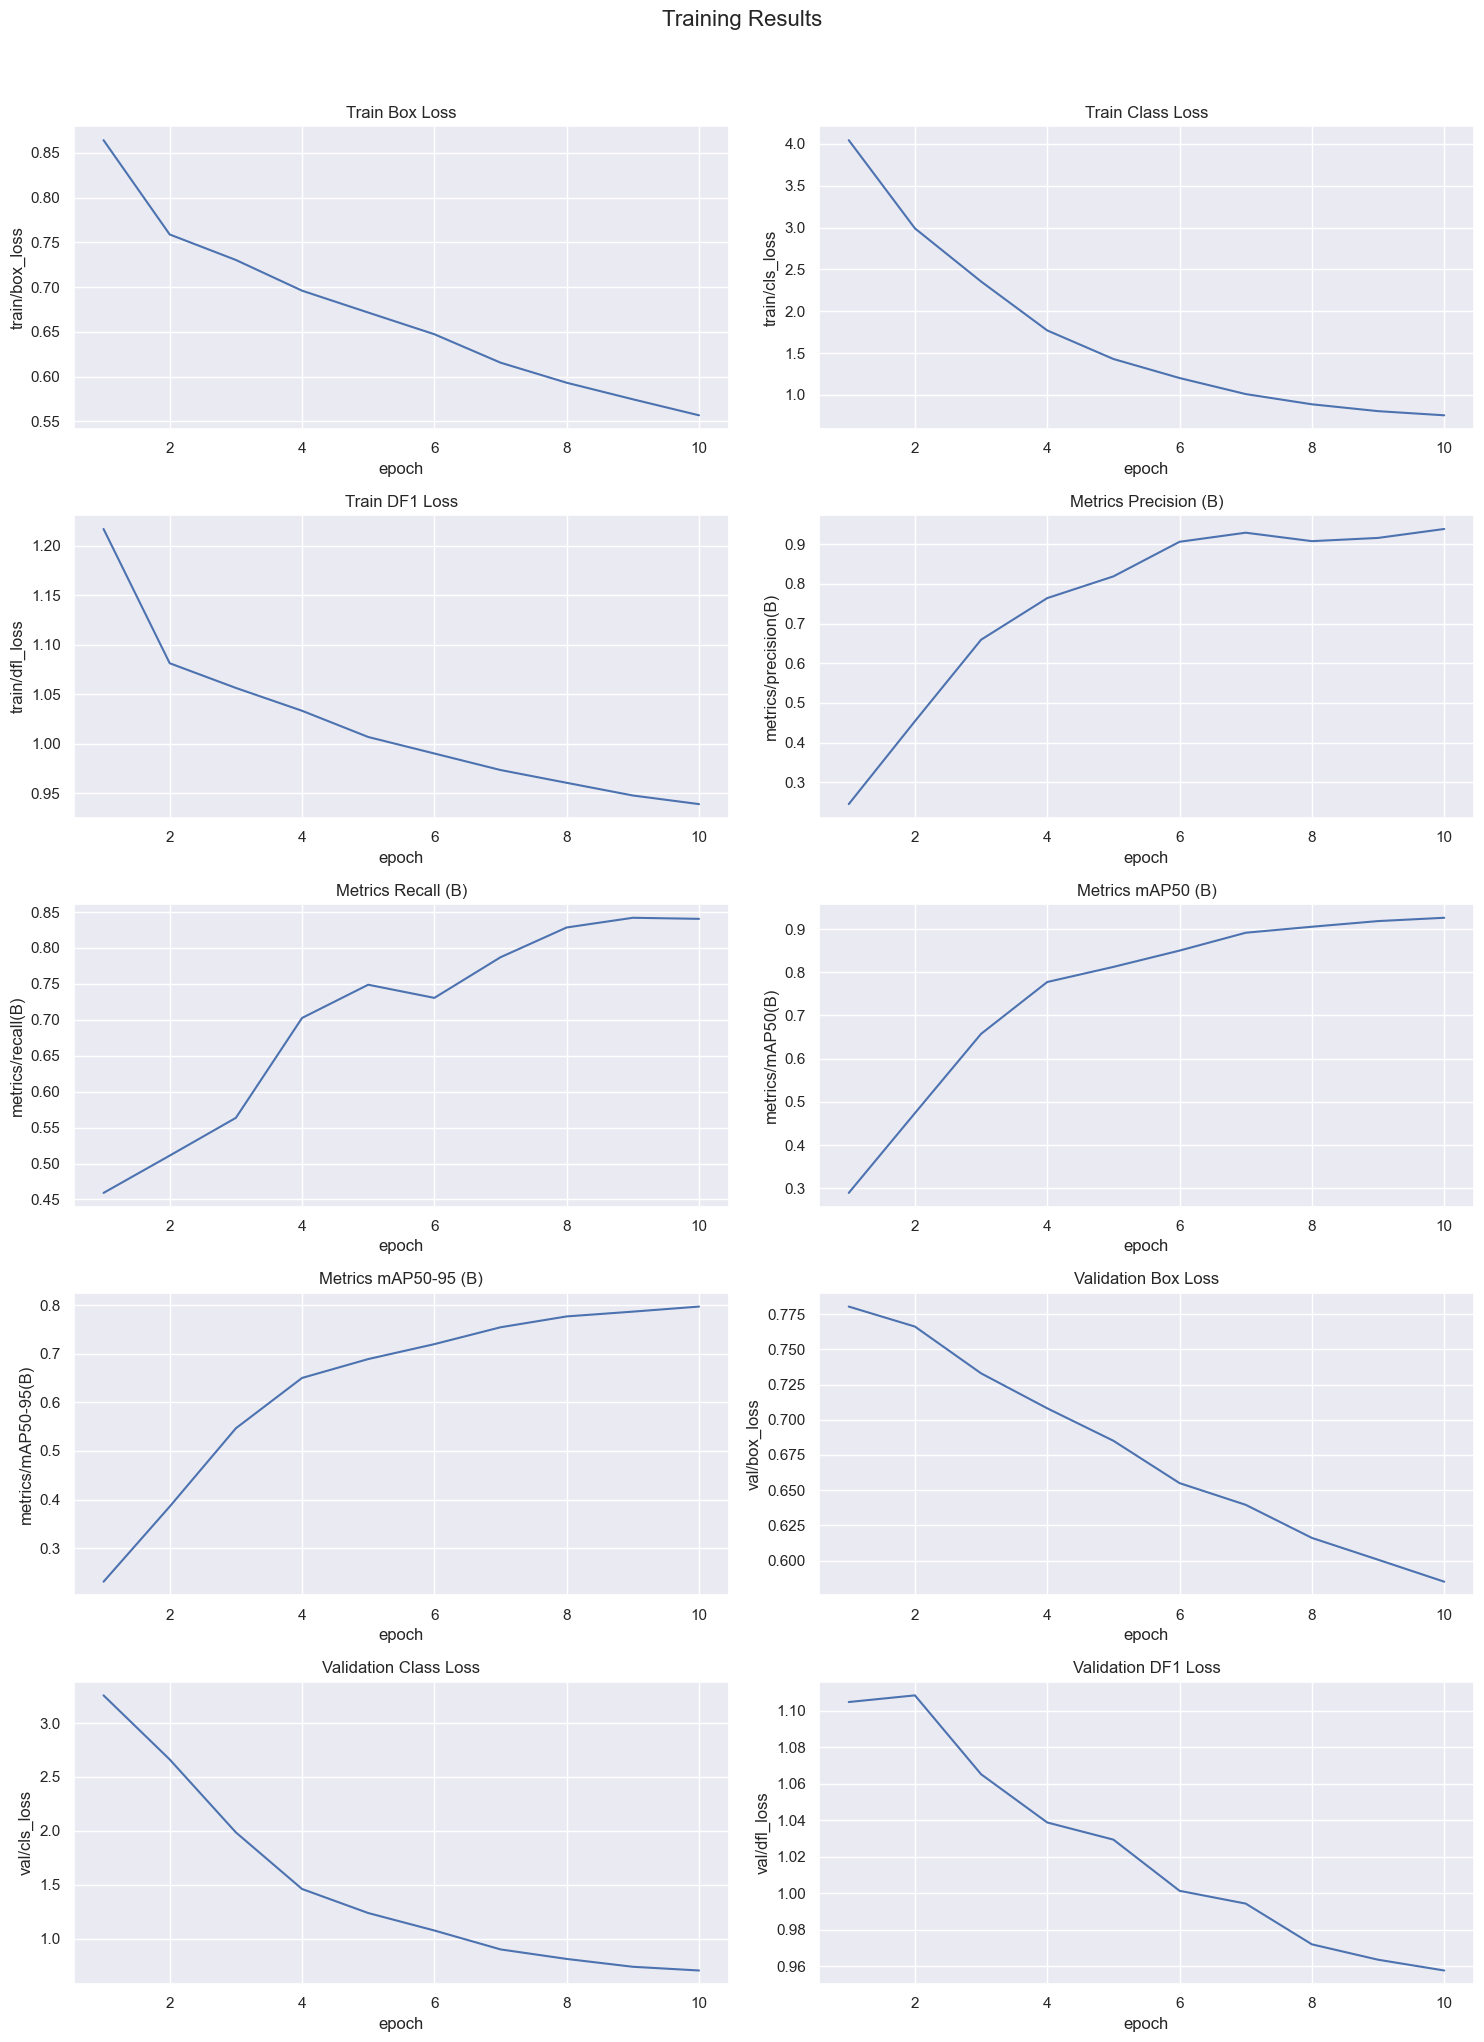

In [80]:
# creat subplots for results
fig, axes = plt.subplots(5,2, figsize=(15, 20))

# Plotting the results
sns.lineplot(data=results_csv, x='epoch', y='train/box_loss', ax=axes[0, 0])
sns.lineplot(data=results_csv, x='epoch', y='train/cls_loss', ax=axes[0, 1])
sns.lineplot(data=results_csv, x='epoch', y='train/dfl_loss', ax=axes[1, 0])
sns.lineplot(data=results_csv, x='epoch', y='metrics/precision(B)', ax=axes[1, 1])
sns.lineplot(data=results_csv, x='epoch', y='metrics/recall(B)', ax=axes[2, 0])
sns.lineplot(data=results_csv, x='epoch', y='metrics/mAP50(B)', ax=axes[2, 1])
sns.lineplot(data=results_csv, x='epoch', y='metrics/mAP50-95(B)', ax=axes[3, 0])
sns.lineplot(data=results_csv, x='epoch', y='val/box_loss', ax=axes[3, 1])
sns.lineplot(data=results_csv, x='epoch', y='val/cls_loss', ax=axes[4, 0])
sns.lineplot(data=results_csv, x='epoch', y='val/dfl_loss', ax=axes[4, 1])

# Setting titles for each subplot
axes[0, 0].set_title('Train Box Loss')
axes[0, 1].set_title('Train Class Loss')
axes[1, 0].set_title('Train DF1 Loss')
axes[1, 1].set_title('Metrics Precision (B)')
axes[2, 0].set_title('Metrics Recall (B)')
axes[2, 1].set_title('Metrics mAP50 (B)')
axes[3, 0].set_title('Metrics mAP50-95 (B)')
axes[3, 1].set_title('Validation Box Loss')
axes[4, 0].set_title('Validation Class Loss')
axes[4, 1].set_title('Validation DF1 Loss')

# Adjust layout
plt.suptitle('Training Results', fontsize=16, y=1.02)
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

In [89]:
# validation model by test dataset
model_val = YOLO('c:\\Users\\soule\\Documents\\traffic detection\\runs\\detect\\train3\\weights\\best.pt')

# Evaluate the model on the test dataset
metrics = model_val.val(split ='val')

Ultralytics 8.3.163  Python-3.12.7 torch-2.7.1+cpu CPU (Intel Core(TM) i5-7300U 2.60GHz)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 1.50.5 MB/s, size: 19.4 KB)


val: Scanning C:\Users\soule\Documents\traffic detection\car\valid\labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [03:54<00:00,  4.60s/it]


                   all        801        944      0.938      0.841      0.926      0.798
           Green Light         87        122      0.862      0.617      0.787      0.446
             Red Light         74        108      0.792      0.731      0.772      0.444
       Speed Limit 100         52         52      0.979       0.88      0.952      0.859
       Speed Limit 110         17         17      0.931        0.8      0.965      0.874
       Speed Limit 120         60         60      0.981      0.881      0.967      0.889
        Speed Limit 20         56         56      0.981      0.941      0.978      0.839
        Speed Limit 30         71         74      0.976      0.932      0.967      0.899
        Speed Limit 40         53         55      0.993      0.909      0.969      0.854
        Speed Limit 50         68         71       0.95      0.803      0.939      0.848
        Speed Limit 60         76         76      0.891      0.864       0.95      0.853
        Speed Limit 7

In [92]:
# final results
print(f'Precision : {metrics.results_dict['metrics/precision(B)']:.2f}')
print(f'Recall : {metrics.results_dict['metrics/recall(B)']:.2f}')
print(f'mAP50 : {metrics.results_dict['metrics/mAP50(B)']:.2f}')
print(f'mAP50-95 : {metrics.results_dict['metrics/mAP50-95(B)']:.2f}')

Precision : 0.94
Recall : 0.84
mAP50 : 0.93
mAP50-95 : 0.80


In [93]:
# making predictions on test dataset
# normalisize the images size function
def normalize_image_size(image):
    """
    Normalize the size of an image to 640x640 pixels.
    
    Parameters:
    - image: np.array, input image.
    
    Returns:
    - np.array, resized image.
    """
    return cv2.resize(image/255, (640, 640))




In [115]:
# liste of all images in the test directory
images_test_file = [file for file in os.listdir(test_dir) if file.endswith('.jpg')]

# select a random image from the test directory
random_image = random.sample(images_test_file, 9)


0: 640x640 1 Speed Limit 100, 528.3ms
Speed: 12.1ms preprocess, 528.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 331.3ms
Speed: 6.7ms preprocess, 331.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 1 Stop, 263.1ms
Speed: 7.6ms preprocess, 263.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 199.1ms
Speed: 6.3ms preprocess, 199.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 1 Speed Limit 90, 190.8ms
Speed: 7.0ms preprocess, 190.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 185.8ms
Speed: 7.8ms preprocess, 185.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 60, 196.7ms
Speed: 5.9ms preprocess, 196.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed

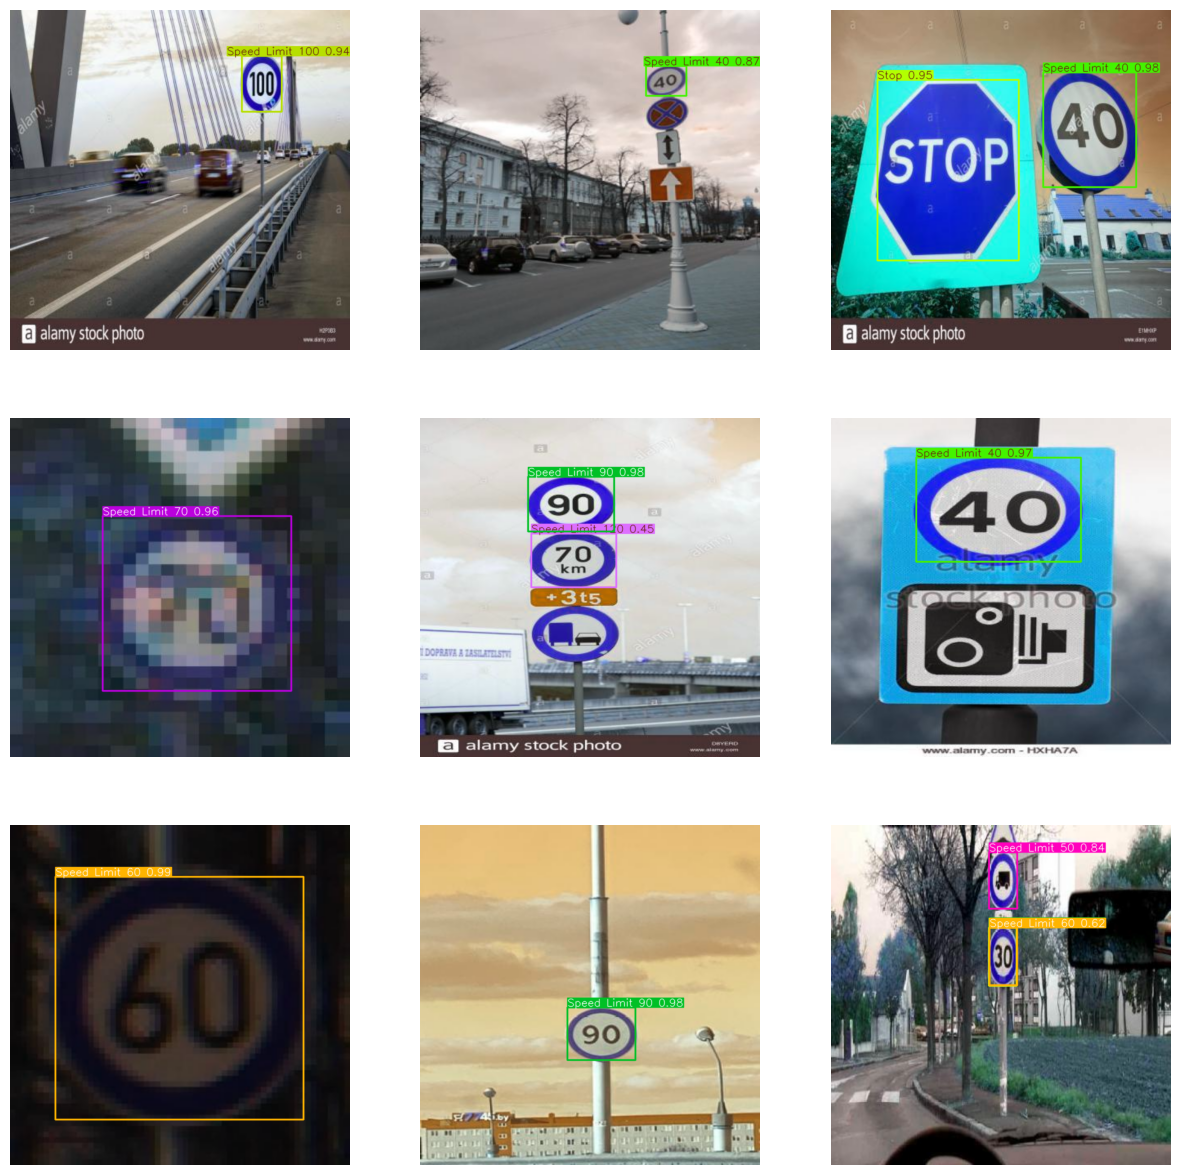

In [116]:
# prepar subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, img_file in enumerate(random_image):
    img_path = os.path.join(test_dir, img_file)
    image = cv2.imread(img_path)
    image = normalize_image_size(image) # normalize the image size to 640x640 pixels

    # Convert the normalized image to uint8 data type
    image = (image * 255).astype(np.uint8)
    
    # make predictions
    results = model_val.predict(source=image, imgsz=(640))
    
    # plot the results with labels
    axes[i//3, i%3].imshow(results[0].plot())
    axes[i//3, i%3].axis('off')


In [125]:
# finish program